Student Depression Exploratory Analysis
----
In this notebook, we will dive deep into mental health of students - mainly depression.  By using the dataset from [kaggle](https://www.kaggle.com/), we will try to pick up as many insights as we can from data.  

Objectives:
- Understand the data and gain basic insights
- Transform the data for in depth analysis
- Visualizing the processed data

In [1]:
import pandas as pd
import matplotlib.pyplot as pplt
import matplotlib.ticker as tckr
import seaborn as sns 

sns.set_style('whitegrid')

dataF = pd.read_csv('Depression Student Dataset.csv', encoding='latin-1')

Let's see the dimensions of the data.

In [ ]:
dataF.info()
dataF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


#### Basic Analysis  

Now, let me analyse the data a bit by using Pandas.
Let's see the counts of male and female in the data.

In [20]:
dataF.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [11]:
dataF['Gender'].value_counts()

Gender
Male      267
Female    235
Name: count, dtype: int64

Of 267 males and 235 females, how many reported themselves as depressed?

In [19]:
dataF['Depression'].groupby(dataF['Gender']).value_counts(sort=False)

Gender  Depression
Female  No            121
        Yes           114
Male    No            129
        Yes           138
Name: count, dtype: int64

#### Data Processing

To deeply analyse the data, we need to transform this dataset by adding a few columns. For that reason, I will calculate the productivity and stress index and add these to the dataframe object.

In [2]:
dataF['Productivity'] = (dataF['Study Satisfaction'] / dataF['Study Hours'])

In [3]:
dataF['Stress Index'] = (dataF['Academic Pressure'] + dataF['Financial Stress'])/2
dataF.tail()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Productivity,Stress Index
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes,0.250,4.0
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes,0.125,3.5
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No,5.000,4.0
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No,0.500,2.5
501,Male,18,5.0,3.0,More than 8 hours,Unhealthy,No,6,2,Yes,Yes,0.500,3.5


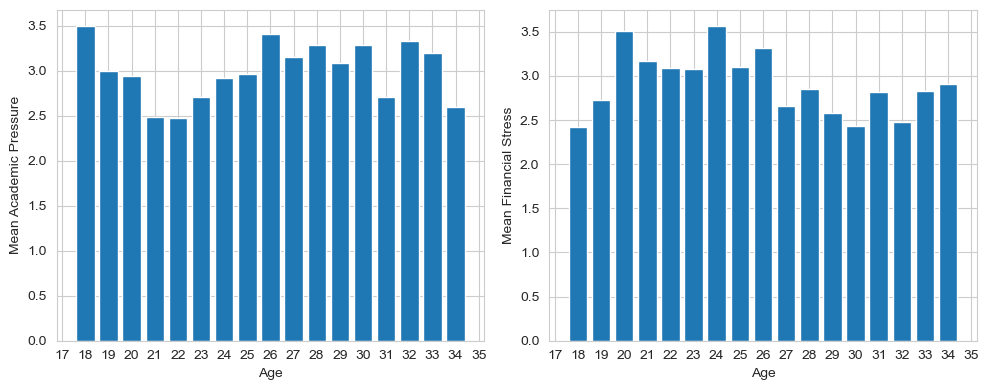

In [5]:
fig, ax = pplt.subplots(ncols= 2, figsize= (10, 4))
ax[0].xaxis.set_major_locator(tckr.MultipleLocator(1))
ax[0].bar(pd.Categorical(dataF['Age']).categories, dataF['Academic Pressure'].groupby(dataF['Age']).mean())
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Mean Academic Pressure')
ax[0].grid(True)

ax[1].xaxis.set_major_locator(tckr.MultipleLocator(1))
ax[1].bar(pd.Categorical(dataF['Age']).categories, dataF['Financial Stress'].groupby(dataF['Age']).mean())
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Mean Financial Stress')

pplt.tight_layout()

Now here, We can see that the stress of the students on academic and finances change based on their age.

<Axes: xlabel='Sleep Duration', ylabel='Age'>

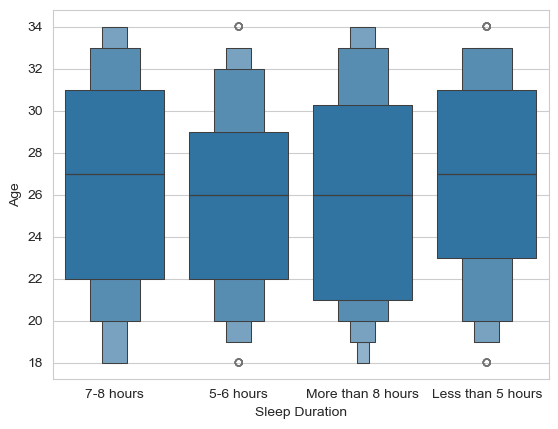

In [17]:
sns.boxenplot(x= 'Sleep Duration', y = 'Age', data= dataF)

<Axes: xlabel='Stress Index', ylabel='Productivity'>

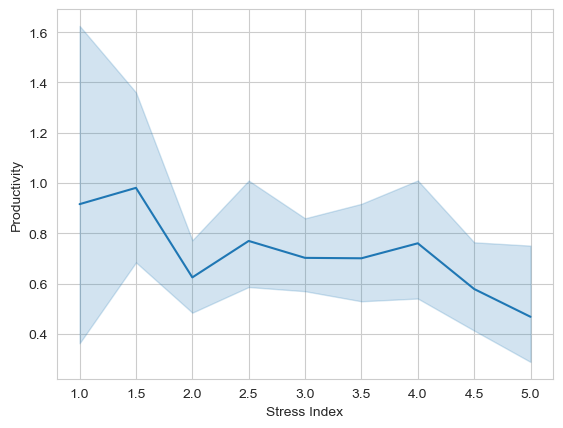

In [6]:
sns.lineplot(x= 'Stress Index', y= 'Productivity', data= dataF)

#### Summary 

After pre-processing and visualising the data, We can now conclude that the factors which can lead to depression of the students include from, sleeping hours to financial concerns.  
   
The most common age of students being depressed is around 18-20 as it's shown by the bar plot due to their academic struggles, financial concerns and very short sleeping duration.